# Haarcascade x HOG x CNN

In [2]:
import cv2
from matplotlib import pyplot as plt
import dlib

In [3]:
def show_img(img):
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.show()

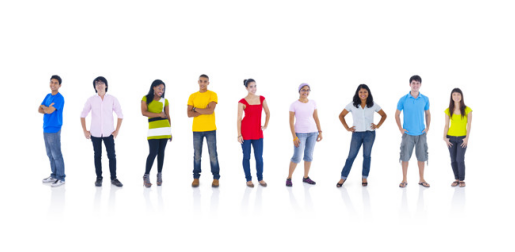

In [4]:
img = cv2.imread('../imgs/people3.jpg')
show_img(img)

## Haarcascade

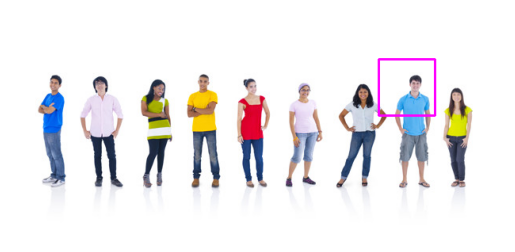

In [37]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
face_detector = cv2.CascadeClassifier('../classifiers/haarcascade_frontalface_default.xml')
detections = face_detector.detectMultiScale(img, scaleFactor=1.001, minNeighbors=5, minSize=(5,5))

img_detected = img.copy()
for (x, y, w, h) in detections:
    cv2.rectangle(img_detected, (x, y), (x+w, y+h), (255, 0, 255), 2)
show_img(img_detected)

## HOG

In [18]:
hog_detector = dlib.get_frontal_face_detector()
detections = hog_detector(img, 4)

detections

rectangles[[(438, 100) (451, 113)], [(505, 89) (518, 103)], [(47, 88) (60, 101)], [(299, 92) (312, 106)], [(182, 95) (196, 109)]]

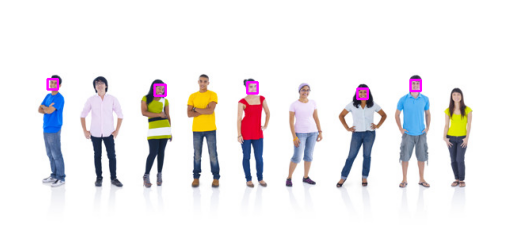

In [19]:
img_detected = img.copy()
for face in detections:
    l, t, r, b = face.left(), face.top(), face.right(), face.bottom()
    cv2.rectangle(img_detected, (l, t), (r, b), (255, 0, 255), 2)
show_img(img_detected)

## CNN

In [39]:
cnn_detector = dlib.cnn_face_detection_model_v1('../weights/mmod_human_face_detector.dat')
detections = cnn_detector(img, 1)

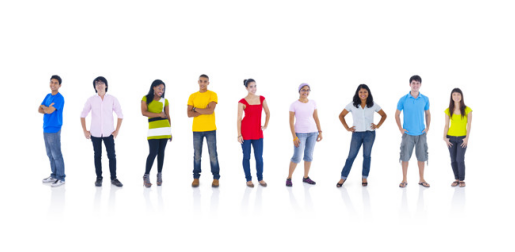

In [25]:
img_detected = img.copy()
for face in detections:
    l, t, r, b, c = face.rect.left(), face.rect.top(), face.rect.right(), face.rect.bottom(), face.confidence
    cv2.rectangle(img_detected, (l, t), (r, b), (255, 0, 255), 2)
show_img(img_detected)